# Group By: split-apply-combine
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

Many times you may wish to split the data set into groups and do something with those groups yourself. In the apply setp, we might wish to do one of the following:
- Aggregatrion: computing a summaty statistic about each group
    - sums or means 
    - sizes / counts
- Transformation: perform some group-specific computaions
    - Standardizing data (zscore) within group
    - Filling NAs within groups with value derived from each group
- Fitration: discard some groups, according to a group-wise computation that evaluates True or False. 
    - Discarding data that belongs to groups with only a few members
    - Filtering out data based on the group sum or mean
- Some combination of the above

Like SQL
``` sql
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

## Splitting an object into groups

``` python
grouped = obj.groupby(key)
grouped = obj.groupby(key, axis=1)
grouped = obj.groupby([key1, key2])

```

In [2]:
import numpy as np
import pandas as pd

In [3]:
In [1]: df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ...:                           'foo', 'bar', 'foo', 'foo'],
   ...:                    'B' : ['one', 'one', 'two', 'three',
   ...:                           'two', 'two', 'one', 'three'],
   ...:                    'C' : np.random.randn(8),
   ...:                    'D' : np.random.randn(8)})
   ...: 

In [2]: df

,A,B,C,D
0,foo,one,-0.051309,1.202194
1,bar,one,2.392804,-1.956319
2,foo,two,-1.565877,-0.888581
3,bar,three,-0.599700,0.707662
4,foo,two,-0.220803,-0.754904
5,bar,two,-1.216977,-0.269664
6,foo,one,-0.488822,-0.006828
7,foo,three,0.090439,0.170653


In [4]:
df.groupby('A')
df.groupby(['A', 'B'])

In [5]:
In [5]: def get_letter_type(letter):
   ...:     if letter.lower() in 'aeiou':
   ...:         return 'vowel'
   ...:     else:
   ...:         return 'consonant'
   ...: 

In [6]: grouped = df.groupby(get_letter_type, axis=1)

In [6]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
grouped = s.groupby(level=0)
grouped.first()

1    1
2    2
3    3
dtype: int64

In [7]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [8]:
grouped.count()

1    2
2    2
3    2
dtype: int64

In [9]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

### GroupBy sorting

In [10]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 
                             'Y' : [1, 2, 3, 4]})


In [11]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [12]:
df2.groupby(['X'], sort = False).sum()

,Y
X,
B,3
A,7


In [13]:
df3 = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [14]:
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


### GroupBy object attributes

In [15]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [16]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [17]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): [1],
 ('bar', 'three'): [3],
 ('bar', 'two'): [5],
 ('foo', 'one'): [0, 6],
 ('foo', 'three'): [7],
 ('foo', 'two'): [2, 4]}

In [18]:
len(grouped)

6

### GroupBy with MultiIndex

In [19]:
In [27]: arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
   ....:           ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
   ....: 

In [28]: index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [29]: s = pd.Series(np.random.randn(8), index=index)

In [20]:
s

first  second
bar    one       0.522228
       two       1.907167
baz    one       0.901536
       two      -1.069975
foo    one      -0.443272
       two      -0.544770
qux    one       0.695921
       two      -0.872602
dtype: float64

In [21]:
grouped = s.groupby(level=0)
grouped.sum()

first
bar    2.429396
baz   -0.168439
foo   -0.988042
qux   -0.176681
dtype: float64

In [22]:
s.groupby(level='second').sum()

second
one    1.676413
two   -0.580179
dtype: float64

In [23]:
s.sum(level='second')

second
one    1.676413
two   -0.580179
dtype: float64

In [24]:
s.groupby(level=['first', 'second']).sum()

first  second
bar    one       0.522228
       two       1.907167
baz    one       0.901536
       two      -1.069975
foo    one      -0.443272
       two      -0.544770
qux    one       0.695921
       two      -0.872602
dtype: float64

### DataFrame column selection in GroupBy

In [25]:
df

,A,B,C,D
0,foo,one,-0.051309,1.202194
1,bar,one,2.392804,-1.956319
2,foo,two,-1.565877,-0.888581
3,bar,three,-0.599700,0.707662
4,foo,two,-0.220803,-0.754904
5,bar,two,-1.216977,-0.269664
6,foo,one,-0.488822,-0.006828
7,foo,three,0.090439,0.170653


In [26]:
grouped = df.groupby(['A'])
grouped_C = df.groupby(['C'])
grouped_D = df.groupby(['D'])
df['C'].groupby(df['A']).groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

## Lterating though groups

In [27]:
grouped = df.groupby('A')
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  2.392804 -1.956319
3  bar  three -0.599700  0.707662
5  bar    two -1.216977 -0.269664
foo
     A      B         C         D
0  foo    one -0.051309  1.202194
2  foo    two -1.565877 -0.888581
4  foo    two -0.220803 -0.754904
6  foo    one -0.488822 -0.006828
7  foo  three  0.090439  0.170653


In [28]:
for name, group in df.groupby(['A', 'B']):
    print (name)
    print (group)

('bar', 'one')
     A    B         C         D
1  bar  one  2.392804 -1.956319
('bar', 'three')
     A      B       C         D
3  bar  three -0.5997  0.707662
('bar', 'two')
     A    B         C         D
5  bar  two -1.216977 -0.269664
('foo', 'one')
     A    B         C         D
0  foo  one -0.051309  1.202194
6  foo  one -0.488822 -0.006828
('foo', 'three')
     A      B         C         D
7  foo  three  0.090439  0.170653
('foo', 'two')
     A    B         C         D
2  foo  two -1.565877 -0.888581
4  foo  two -0.220803 -0.754904


## Selecting a group

In [29]:
grouped.get_group('bar')

,A,B,C,D
1,bar,one,2.392804,-1.956319
3,bar,three,-0.599700,0.707662
5,bar,two,-1.216977,-0.269664


In [30]:
df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,2.392804,-1.956319


## Aggregation

In [31]:
grouped = df.groupby('A')
grouped.aggregate(np.sum)

,C,D
A,,
bar,0.576128,-1.518321
foo,-2.236371,-0.277467


In [32]:
grouped = df.groupby(['A', 'B'])
grouped.aggregate(np.sum)

C         D
A   B                        
bar one    2.392804 -1.956319
    three -0.599700  0.707662
    two   -1.216977 -0.269664
foo one   -0.540131  1.195366
    three  0.090439  0.170653
    two   -1.786679 -1.643485

In [33]:
In [50]: grouped = df.groupby(['A', 'B'], as_index=False)

In [51]: grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,2.392804,-1.956319
1,bar,three,-0.599700,0.707662
2,bar,two,-1.216977,-0.269664
3,foo,one,-0.540131,1.195366
4,foo,three,0.090439,0.170653
5,foo,two,-1.786679,-1.643485


In [34]:
In [53]: df.groupby(['A', 'B']).sum().reset_index()

,A,B,C,D
0,bar,one,2.392804,-1.956319
1,bar,three,-0.599700,0.707662
2,bar,two,-1.216977,-0.269664
3,foo,one,-0.540131,1.195366
4,foo,three,0.090439,0.170653
5,foo,two,-1.786679,-1.643485


In [35]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [36]:
grouped.describe()

C         D
0 count  1.000000  1.000000
  mean   2.392804 -1.956319
  std         NaN       NaN
  min    2.392804 -1.956319
  25%    2.392804 -1.956319
  50%    2.392804 -1.956319
  75%    2.392804 -1.956319
  max    2.392804 -1.956319
1 count  1.000000  1.000000
  mean  -0.599700  0.707662
  std         NaN       NaN
  min   -0.599700  0.707662
  25%   -0.599700  0.707662
  50%   -0.599700  0.707662
  75%   -0.599700  0.707662
  max   -0.599700  0.707662
2 count  1.000000  1.000000
  mean  -1.216977 -0.269664
  std         NaN       NaN
  min   -1.216977 -0.269664
  25%   -1.216977 -0.269664
  50%   -1.216977 -0.269664
  75%   -1.216977 -0.269664
  max   -1.216977 -0.269664
3 count  2.000000  2.000000
  mean  -0.270066  0.597683
  std    0.309368  0.854907
  min   -0.488822 -0.006828
  25%   -0.379444  0.295427
  50%   -0.270066  0.597683
  75%   -0.160687  0.899938
  max   -0.051309  1.202194
4 count  1.000000  1.000000
  mean   0.090439  0.170653
  std         NaN       NaN
  min    0.090439  0.170653
  25%    0.090439  0.170653
  50%    0.090439  0.170653
  75%    0.090439  0.170653
  max    0.090439  0.170653
5 count  2.000000  2.000000
  mean  -0.893340 -0.821742
  std    0.951111  0.094524
  min   -1.565877 -0.888581
  25%   -1.229608 -0.855161
  50%   -0.893340 -0.821742
  75%   -0.557071 -0.788323
  max   -0.220803 -0.754904

### Applying multiple functions at once

In [37]:
In [56]: grouped = df.groupby('A')

In [57]: grouped['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,0.576128,0.192043,1.930744
foo,-2.236371,-0.447274,0.661478


In [38]:
In [58]: grouped['D'].agg({'result1' : np.sum,
   ....:                   'result2' : np.mean})
   ....: 

,result2,result1
A,,
bar,-0.506107,-1.518321
foo,-0.055493,-0.277467


In [39]:
In [59]: grouped.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.576128  0.192043  1.930744 -1.518321 -0.506107  1.347638
foo -2.236371 -0.447274  0.661478 -0.277467 -0.055493  0.839419

### Applying different functions to DataFrame columns

In [40]:
grouped.agg({'C': np.sum, 
            'D' : lambda x: np.std(x, ddof=1)})
# grouped['D'].agg({'result1' : np.sum,
#                   'result2' : np.mean})

,C,D
A,,
bar,0.576128,1.347638
foo,-2.236371,0.839419


In [41]:
grouped.agg({'C' : 'sum', 'D' : 'std'})

,C,D
A,,
bar,0.576128,1.347638
foo,-2.236371,0.839419


### Cython-optimized aggregation functions
current only `sum` , `mean`, `std`, `sem` have optimized 

## Transformation

In [42]:
index = pd.date_range('10/1/1999', periods=100)
ts = pd.Series(np.random.normal(0.5, 2, 100), index)
# ts = ts.rolling(window=100, min_periods=100).mean().dropna()
# ts = ts.rolling(window=100,min_periods=100).mean().dropna()
ts.shape

(100,)

In [43]:
key = lambda x: x.year

zscore = lambda x: (x - x.mean()) / x.std()

transformed = ts.groupby(key).transform(zscore)

In [44]:
transformed

1999-10-01    0.760276
1999-10-02   -1.362055
1999-10-03    0.188383
1999-10-04   -0.701757
1999-10-05   -0.745599
1999-10-06   -0.773143
1999-10-07    3.022632
1999-10-08    0.682939
1999-10-09    0.676688
1999-10-10    0.213469
1999-10-11   -0.488117
1999-10-12    0.058119
1999-10-13   -0.598638
1999-10-14    0.478340
1999-10-15   -0.228471
1999-10-16   -0.218656
1999-10-17   -1.780361
1999-10-18   -1.542270
1999-10-19   -0.877644
1999-10-20    0.453379
1999-10-21    0.283417
1999-10-22    1.740427
1999-10-23    0.299733
1999-10-24   -1.933444
1999-10-25   -1.124219
1999-10-26   -1.165641
1999-10-27   -0.355455
1999-10-28   -0.545220
1999-10-29    0.545240
1999-10-30    0.990282
                ...   
1999-12-10    0.102388
1999-12-11    2.572504
1999-12-12    0.249553
1999-12-13   -0.514042
1999-12-14    0.570341
1999-12-15    0.962206
1999-12-16   -0.040985
1999-12-17   -0.609757
1999-12-18   -0.579276
1999-12-19    0.882897
1999-12-20    1.541562
1999-12-21    0.951334
1999-12-22 

In [45]:
ts.groupby(key).std()

1999    2.085898
2000    1.240773
dtype: float64

In [46]:
transformed.groupby(key).std()

1999    1.0
2000    1.0
dtype: float64

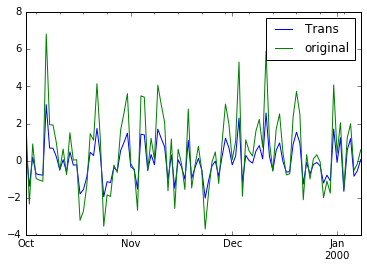

In [47]:
%matplotlib inline
compare = pd.DataFrame({'original': ts, 
                       'Trans': transformed})
compare.plot()

In [48]:
data_df = pd.DataFrame({'A' : np.random.rand(1000),
                        'B' : np.random.rand(1000),
                        'C' : np.random.rand(1000)
                       })

In [49]:
countries = np.array(['US', 'UK', 'GR', 'JP'])
key = countries[np.random.randint(0, 4, 1000)]
grouped = data_df.groupby(key)
grouped.count()

,A,B,C
GR,271,271,271
JP,228,228,228
UK,234,234,234
US,267,267,267


In [50]:
f = lambda x : x.fillna(x.mean())
transformed = grouped.transform(f)

In [51]:
# 检测NA
grouped_trans = transformed.groupby(key)
grouped.mean() 

,A,B,C
GR,0.505512,0.500977,0.482810
JP,0.514495,0.475100,0.509378
UK,0.475620,0.493646,0.543543
US,0.517571,0.523248,0.467874


In [52]:
grouped_trans.mean() 

,A,B,C
GR,0.505512,0.500977,0.482810
JP,0.514495,0.475100,0.509378
UK,0.475620,0.493646,0.543543
US,0.517571,0.523248,0.467874


In [53]:
grouped.count()

,A,B,C
GR,271,271,271
JP,228,228,228
UK,234,234,234
US,267,267,267


- fillna
- ffill
- bfill
- shift

## Filtration

In [54]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x : x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [55]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})

In [56]:
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [57]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [58]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [59]:
dff['C'] = np.arange(8)
dff.groupby('B').filter(lambda x: len(x['C']) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


In [60]:
dff.groupby('B').head(2)

,A,B,C
0,0,a,0
1,1,a,1
2,2,b,2
3,3,b,3
6,6,c,6
7,7,c,7


## Dispatching to instance methods

In [61]:
In [102]: grouped = df.groupby('A')

In [103]: grouped.agg(lambda x: x.std())

,C,D
A,,
bar,1.930744,1.347638
foo,0.661478,0.839419


In [62]:
grouped.std()

,C,D
A,,
bar,1.930744,1.347638
foo,0.661478,0.839419


In [63]:
In [105]: tsdf = pd.DataFrame(np.random.randn(1000, 3),
   .....:                     index=pd.date_range('1/1/2000', periods=1000),
   .....:                     columns=['A', 'B', 'C'])
   .....: 

In [106]: tsdf.ix[::2] = np.nan

In [107]: grouped = tsdf.groupby(lambda x: x.year)

In [108]: grouped.fillna(method='pad')

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-0.801904,-0.624294,0.327104
2000-01-03,-0.801904,-0.624294,0.327104
2000-01-04,-0.897914,1.217133,-0.479104
2000-01-05,-0.897914,1.217133,-0.479104
2000-01-06,0.734290,-0.411216,0.516941
2000-01-07,0.734290,-0.411216,0.516941
2000-01-08,-1.083665,0.519276,0.224974
2000-01-09,-1.083665,0.519276,0.224974
2000-01-10,-0.466147,0.376043,-1.301708


In [64]:
In [109]: s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])

In [110]: g = pd.Series(list('abababab'))

In [111]: gb = s.groupby(g)

In [112]: gb.nlargest(3)

a  4    19.0
   0     9.0
   2     7.0
b  1     8.0
   3     5.0
   7     3.3
dtype: float64

## Flexible apply

In [65]:
df

,A,B,C,D
0,foo,one,-0.051309,1.202194
1,bar,one,2.392804,-1.956319
2,foo,two,-1.565877,-0.888581
3,bar,three,-0.599700,0.707662
4,foo,two,-0.220803,-0.754904
5,bar,two,-1.216977,-0.269664
6,foo,one,-0.488822,-0.006828
7,foo,three,0.090439,0.170653


In [66]:
grouped = df.groupby('A')
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     0.192043
     std      1.930744
     min     -1.216977
     25%     -0.908338
     50%     -0.599700
     75%      0.896552
     max      2.392804
foo  count    5.000000
     mean    -0.447274
     std      0.661478
     min     -1.565877
     25%     -0.488822
     50%     -0.220803
     75%     -0.051309
     max      0.090439
dtype: float64

In [67]:
grouped = df.groupby('A')['C']
def f(group):
    return pd.DataFrame({'ori' : group, 
                        'demeaned': group- group.mean()})
grouped.apply(f)

,demeaned,ori
0,0.395965,-0.051309
1,2.200762,2.392804
2,-1.118602,-1.565877
3,-0.791742,-0.599700
4,0.226472,-0.220803
5,-1.409019,-1.216977
6,-0.041548,-0.488822
7,0.537713,0.090439


In [68]:
In [120]: def f(x):
   .....:   return pd.Series([ x, x**2 ], index = ['x', 'x^s'])
   .....: 
    

In [69]:
s.apply(f)

,x,x^s
0,9.0,81.00
1,8.0,64.00
2,7.0,49.00
3,5.0,25.00
4,19.0,361.00
5,1.0,1.00
6,4.2,17.64
7,3.3,10.89


## Other useful features

### Automatic exclusion of “nuisance” columns

In [70]:
df.groupby('A').std()

,C,D
A,,
bar,1.930744,1.347638
foo,0.661478,0.839419


### NA and NaT group handling
- never be an 'NA' group or 'NaT' group

### Grouping with orderd gactors

In [71]:
data = pd.Series(np.random.randn(100))
factor = pd.qcut(data, [0, .25, .5, .75, 1.])
data.groupby(factor).mean()

[-2.18, -0.767]   -1.431761
(-0.767, 0.027]   -0.257591
(0.027, 0.803]     0.345634
(0.803, 2.0984]    1.307100
dtype: float64

### Grouping with a grouper specification

In [72]:
In [131]: import datetime

In [132]: df = pd.DataFrame({
   .....:          'Branch' : 'A A A A A A A B'.split(),
   .....:          'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
   .....:          'Quantity': [1,3,5,1,8,1,9,3],
   .....:          'Date' : [
   .....:              datetime.datetime(2013,1,1,13,0),
   .....:              datetime.datetime(2013,1,1,13,5),
   .....:              datetime.datetime(2013,10,1,20,0),
   .....:              datetime.datetime(2013,10,2,10,0),
   .....:              datetime.datetime(2013,10,1,20,0),
   .....:              datetime.datetime(2013,10,2,10,0),
   .....:              datetime.datetime(2013,12,2,12,0),
   .....:              datetime.datetime(2013,12,2,14,0),
   .....:              ]
   .....:          })
   .....: 

In [133]: df

,Branch,Buyer,Date,Quantity
0,A,Carl,2013-01-01 13:00:00,1
1,A,Mark,2013-01-01 13:05:00,3
2,A,Carl,2013-10-01 20:00:00,5
3,A,Carl,2013-10-02 10:00:00,1
4,A,Joe,2013-10-01 20:00:00,8
5,A,Joe,2013-10-02 10:00:00,1
6,A,Joe,2013-12-02 12:00:00,9
7,B,Carl,2013-12-02 14:00:00,3


In [74]:
df.groupby([pd.Grouper(freq='1M',key='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [75]:
In [135]: df = df.set_index('Date')

In [136]: df['Date'] = df.index + pd.offsets.MonthEnd(2)

In [137]: df.groupby([pd.Grouper(freq='6M',key='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [76]:
In [138]: df.groupby([pd.Grouper(freq='6M',level='Date'),'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2014-01-31 Carl          9
           Joe          18

### Taking the first rows of each group

In [77]:
In [139]: df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])

In [140]: df

,A,B
0,1,2
1,1,4
2,5,6


In [80]:
g = df.groupby('A')
g.head(1)

,A,B
0,1,2
2,5,6


### Taking the nth row of each group

In [81]:
In [144]: df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])

In [145]: g = df.groupby('A')

In [146]: g.nth(0)

,B
A,
1,NaN
5,6.0


In [82]:
In [147]: g.nth(-1)

,B
A,
1,4.0
5,6.0


In [83]:
In [148]: g.nth(1)

,B
A,
1,4.0


In [84]:
# nth(0) is the same as g.first()
In [149]: g.nth(0, dropna='any')

,B
A,
1,4.0
5,6.0


In [85]:
In [150]: g.first()

,B
A,
1,4.0
5,6.0


In [86]:
# nth(-1) is the same as g.last()
In [151]: g.nth(-1, dropna='any')  # NaNs denote group exhausted when using dropna


,B
A,
1,4.0
5,6.0


In [87]:
In [152]: g.last()

,B
A,
1,4.0
5,6.0


In [88]:
In [153]: g.B.nth(0, dropna=True)

A
1    4.0
5    6.0
Name: B, dtype: float64

In [89]:
In [154]: df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])

In [155]: g = df.groupby('A',as_index=False)

In [156]: g.nth(0)

,A,B
0,1,NaN
2,5,6.0


In [90]:
In [158]: business_dates = pd.date_range(start='4/1/2014', end='6/30/2014', freq='B')

In [159]: df = pd.DataFrame(1, index=business_dates, columns=['a', 'b'])

# get the first, 4th, and last date index for each month
In [160]: df.groupby((df.index.year, df.index.month)).nth([0, 3, -1])


,a,b
2014-04-01,1,1
2014-04-04,1,1
2014-04-30,1,1
2014-05-01,1,1
2014-05-06,1,1
2014-05-30,1,1
2014-06-02,1,1
2014-06-05,1,1
2014-06-30,1,1


### Enumerate group items

In [91]:
In [161]: df = pd.DataFrame(list('aaabba'), columns=['A'])

In [162]: df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [92]:
In [163]: df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [93]:
In [164]: df.groupby('A').cumcount(ascending=False)  # kwarg only

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

### Ploting

In [94]:
In [165]: np.random.seed(1234)

In [166]: df = pd.DataFrame(np.random.randn(50, 2))

In [167]: df['g'] = np.random.choice(['A', 'B'], size=50)

In [168]: df.loc[df['g'] == 'B', 1] += 3

C:\Users\Chao\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3079: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([('A',
              {'boxes': [<matplotlib.lines.Line2D at 0x210a114e3c8>,
               'caps': [<matplotlib.lines.Line2D at 0x210a11afb00>,
               'fliers': [<matplotlib.lines.Line2D at 0x210a11b4a90>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x210a11516a0>,
               'whiskers': [<matplotlib.lines.Line2D at 0x210a114e208>,
                <matplotlib.lines.Line2D at 0x210a11c0a20>]}),
             ('B',
              {'boxes': [<matplotlib.lines.Line2D at 0x210a10f1940>,
               'caps': [<matplotlib.lines.Line2D at 0x210a11d3cf8>,
               'fliers': [<matplotlib.lines.Line2D at 0x210a11decc0>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x210a11d9d68>,
               'whiskers': [<matplotlib.lines.Line2D at 0x210a10cd400>,
                <matplotlib.lines.Line2D at 0x210a11e3e10>]})])

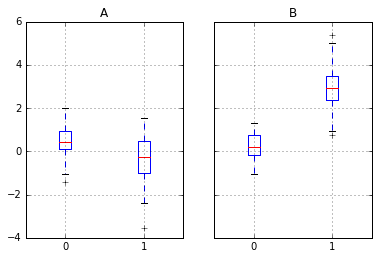

In [95]:
In [169]: df.groupby('g').boxplot()

## Example
### Regrouping by factor

In [96]:
In [170]: df = pd.DataFrame({'a':[1,0,0], 'b':[0,1,0], 'c':[1,0,0], 'd':[2,3,4]})

In [171]: df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [98]:
df.sum()

a    1
b    1
c    1
d    9
dtype: int64

In [97]:
In [172]: df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


### Returning a Series to propagate name

In [99]:
In [173]: df = pd.DataFrame({
   .....:          'a':  [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
   .....:          'b':  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
   .....:          'c':  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
   .....:          'd':  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
   .....:          })
   .....: 

In [174]: def compute_metrics(x):
   .....:     result = {'b_sum': x['b'].sum(), 'c_mean': x['c'].mean()}
   .....:     return pd.Series(result, name='metrics')
   .....: 

In [175]: result = df.groupby('a').apply(compute_metrics)

In [176]: result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [100]:
In [177]: result.stack()

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64